<a href="https://colab.research.google.com/github/kristipatithoyajakshakashyap/Machine-Learning/blob/main/car%20Prediction/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection adn Preprocessing


In [5]:
#loding the data from csv to pandas df
car_dataset = pd.read_csv('/content/car data.csv')

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking rows and cloumns
car_dataset.shape

(301, 9)

In [8]:
#getting info from dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking no od missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#cheking distribution of categorial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
#encoding the categorial data
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [15]:
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

model Evaluation

In [17]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:" , error_score)

R squared Error: 0.8799451660493711


Visualize actual Price and Prediction

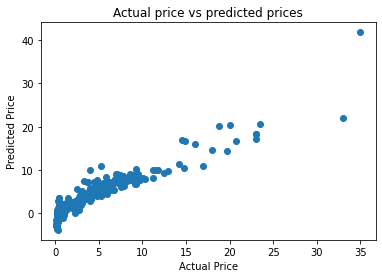

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

In [20]:
#prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:" , error_score)

R squared Error: 0.8365766715027051


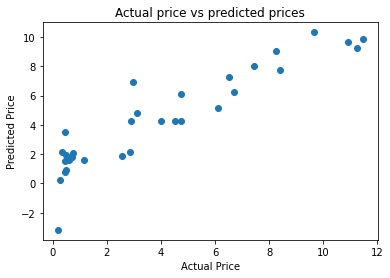

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

2. Lasso Regression

In [23]:
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

model Evaluation

In [25]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:" , error_score)

R squared Error: 0.8427856123435794


Visualize actual Price and Prediction

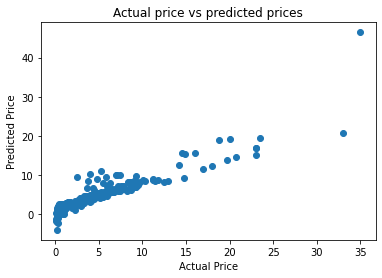

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()

In [28]:
#prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:" , error_score)

R squared Error: 0.8709167941173195


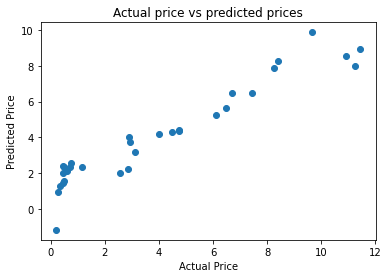

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted prices")
plt.show()